In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
url = "https://raw.githubusercontent.com/rocksaint/fruit-data-with-colours/master/fruit_data_with_colours.csv"

data = read_csv(url)

In [2]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
data.shape

(59, 7)

In [4]:
orjinal_meyveler = dict(zip(data.fruit_label.unique(), data.fruit_name.unique())) # Veri setinde kaç sınıf olduğuna bakalım , Etiketlerini ve isimlerini ekrana yazdırdık.
print(orjinal_meyveler)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [56]:
X = data[["height", "width", "mass", "color_score"]] #Girdi - Input
y = data["fruit_label"] #Çıktı - Output
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

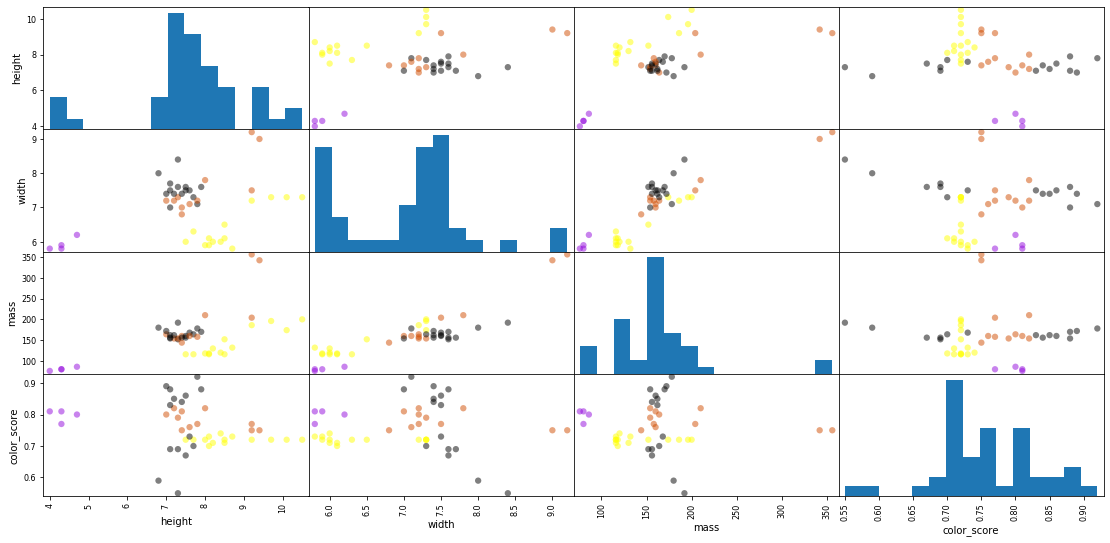

In [57]:
from matplotlib import cm

cmap = cm.get_cmap("gnuplot")
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = "o", s = 40, hist_kwds = {"bins": 15}, figsize = (19, 9), cmap = cmap)
# X_train ile girdi verilerini alıyor, c = y_train ile çıktı değerlerine göre sınıfları renklendiriyor, sınıf gözlemlerini "o"lar ile gösteriyor.


In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)

knn.fit(X_train, y_train) #Öğrenme
knn.score(X_test, y_test) #Test

0.6

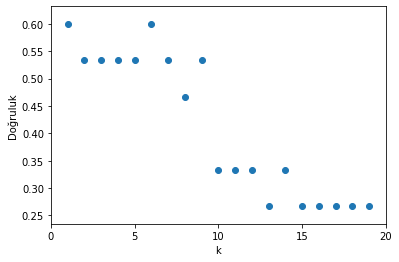

In [59]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(X_train, y_train)
    scores.append(knn1.score(X_test, y_test))


plt.figure()
plt.xlabel("k")
plt.ylabel("Doğruluk")
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20]);

In [60]:
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.7]]) # Yeni gelen verinin(gözlemin) bilgilerine göre cinsini tahmin(test) edicek.
#Ve tahmin edilen değeri hazırladığımız orjinal meyveler isimli sütundan eşleştiricek.
orjinal_meyveler[fruit_prediction[0]]

'mandarin'

In [61]:
# Modelin yeni gelen gözlemin bilgileri doğrultusunda meyvenin "mandarin" olduğunu tahmin etti.

In [62]:
print("K-NN için eğitim seti performansı: {:.2f}" .format(knn.score(X_train, y_train)))
print("K-NN için test seti performansı: {:.2f}" .format(knn.score(X_test, y_test)))

K-NN için eğitim seti performansı: 0.73
K-NN için test seti performansı: 0.60


In [63]:
# Yukarıda yeni gözlem için gerçekleştirdiğimiz tahmini bu şekilde de yaptırabiliriz.
deneme = [[20, 4.3, 5.5, 0.7]]
print("Tahmin edilecek meyvenin değerleri: ", deneme, ":", orjinal_meyveler[knn.predict(deneme)[0]])

Tahmin edilecek meyvenin değerleri:  [[20, 4.3, 5.5, 0.7]] : mandarin


In [69]:
# Aynı örneği farklı makine öğrenmesi algoritmaları ile deneyelim.
# Karar Ağaçları
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)

print("Karar ağaçları için eğitim seti performansı: {:.2f}" .format(clf.score(X_train, y_train)))
print("Karar ağaçları için test seti performansı: {:.2f}" .format(clf.score(X_test, y_test)))

Karar ağaçları için eğitim seti performansı: 0.93
Karar ağaçları için test seti performansı: 0.73


In [72]:
print("Öznitelik Önemleri: {}" .format(clf.feature_importances_))

Öznitelik Önemleri: [0.44655827 0.4563359  0.09710582 0.        ]


In [75]:
from sklearn.metrics import confusion_matrix
clf_predicted = clf.predict(X_test)
print(confusion_matrix(y_test, clf_predicted))

[[1 0 3 0]
 [0 1 0 0]
 [1 0 7 0]
 [0 0 0 2]]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_predicted))

              precision    recall  f1-score   support

           1       0.50      0.25      0.33         4
           2       1.00      1.00      1.00         1
           3       0.70      0.88      0.78         8
           4       1.00      1.00      1.00         2

    accuracy                           0.73        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.71      0.73      0.70        15



Test İçin; 


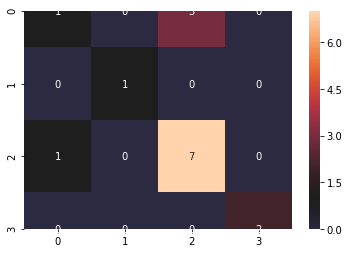

In [81]:
import seaborn as sns
print("Test İçin; ")
cm = confusion_matrix(y_test , clf_predicted)
sns.heatmap(cm, center = True, annot = True, fmt = "d")